# Learning Theory Homework 
***
**Name**: $<$Harshini Priya Muthukrishnan$>$ 
***

This assignment is due on Moodle by **5pm on Friday March 9th**. Submit only this Jupyter notebook to Moodle. Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI5622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy)



## Overview 
***

In this assignment you will explore the concepts of PAC learnability and VC dimension. 


In [371]:
import random
import math
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [15 points] Problem 1: 
***

Consider the class C of concepts defined by triangles with **distinct** vertices of the form $(i, j)$ where $i$ and $j$ are integers in the interval $[0,99]$. A concept c labels points on the interior and boundary of the associated triangle as positive and points exterior to the triangle as negative.

**Note**: To make life easier, we'll allow degenerate triangles in $C$. That is, triangles where the vertices are collinear. The following image depicts an example of a nondegenerate and a degenerate triangle.

<img src="figs/triangles.png" width=400 height=50>  

**Part A**: Suppose we have an algorithm that produces a consistent $h$ from the hypothesis class $H = C$. Give a bound on the number of training examples sufficient to assure that for any target concept $c$ in $C$, our algorithm will, with probability $1-\delta$, output a hypothesis $h$ with generalization error at most $\epsilon$.

**Answer**

The bound on the number of training examples is given by:
$$
m >=\frac{1}{\epsilon} (\ln{|H|}+\ln\frac{1}{\delta}) 
$$
The cardinality of H is found by using any of the three points from a combination of (100*100)C3 points.
$$m >=\frac{1}{\epsilon} (\ln\frac{10000!}{9997!*3!}+\ln\frac{1}{\delta})\\
m >= \frac{1}{\epsilon} ({25.839}+\ln\frac{1}{\delta})
$$

**Part B**: Based on your bound in **Part A**, determine the minimum number of training examples necessary such that for any target concept $c$ in $C$, our algorithm will, with probability $0.95$, output a hypothesis $h$ with generalization error at most $0.15$.  

** Answer **
  
Error, $\epsilon$ = 0.15  
  
Confidence, $\delta$ = 1-0.95=0.05  

We know the bound m as,  
$$  
$m>=\frac{1}{\epsilon}(ln|H|+ln\frac{1}{\delta})$  
$$  
Using the formula we derived in the previous part,
$$
$m>=\frac{1}{0.15}(25.839 +ln\frac{1}{0.05})$  
$$
$$
$m>=\frac{1}{0.15}(28.834)$  
$$
$$
m>=192.2266  
$$
$$
m=193  
$$

### [15 points] Problem 2: 
***

Consider feature vectors that live in two-dimensional space and the class of hypotheses defined by circles **centered at the origin**. There are two different kinds of hypotheses $h$ in this class. One type of hypothesis classifies points as positive if they lie on the boundary or **interior** of the circle, and negative otherwise. The other type of hypothesis classifies points as positive if they lie on the boundary or **exterior** of the circle, and negative otherwise. State and prove (rigorously) the VC dimension of this family of classifiers.

### Answer:
**Hypothesis 1**
Circle which will classify the **exterior points as positive** - points inside the circle are negative

**Hypothesis 2**
Circle which will classify the **interior points as positive** - points outside the circle are negative

Iteratively starting from one point.
Below code examines the case when m = 1

In the graphs below, yellow indicates the area where the points are negative and green indicates the area where the points are positive

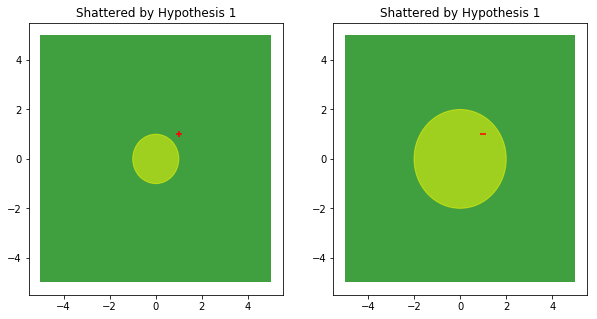

In [401]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].fill([-5,-5,5,5],[-5,5,5,-5],"g", zorder=1,alpha=0.75)
axes[0].add_patch(plt.Circle((0, 0), 1, color='yellow',alpha=0.5))
axes[0].scatter([1],[1],marker='+',color='r',zorder=2)
axes[0].set_title("Shattered by Hypothesis 1")

axes[1].fill([-5,-5,5,5],[-5,5,5,-5],"g", zorder=1,alpha=0.75)
axes[1].add_patch(plt.Circle((0, 0), 2, color='yellow',alpha=0.5))
axes[1].scatter([1],[1],marker='_',color='r',zorder=2)
axes[1].set_title("Shattered by Hypothesis 1")
plt.show()

From the above graph, it is clear that the lowest possible value for VC is atleast 1. So now we will iteratively go up the m value incrementing one by one. The below code constructs the graph for m=2 and consider all the possible cases of the value of the two points. That is the four possible combinations of positive and neative values for the two points are plotted

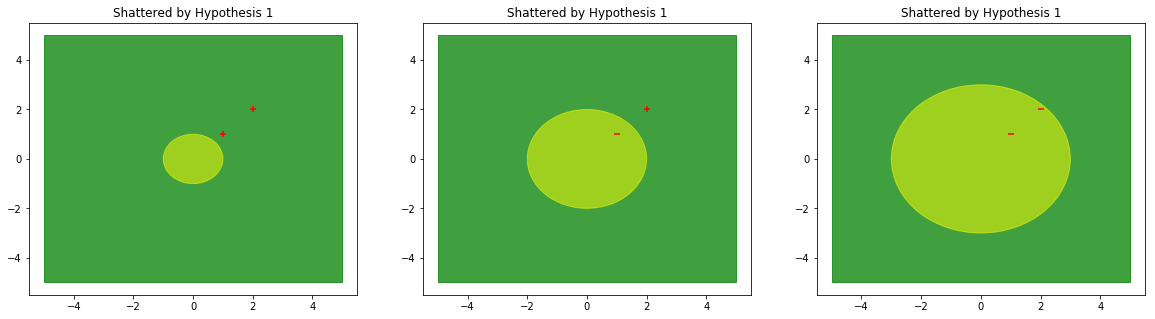

In [373]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
axes[0].fill([-5,-5,5,5],[-5,5,5,-5], zorder=0,color='green',alpha=0.75)
axes[0].add_patch(plt.Circle((0, 0), 1, color='yellow',alpha=0.5))
axes[0].scatter([1,2],[1,2],c="r",marker='+',zorder=2)
axes[0].set_title("Shattered by Hypothesis 1")

axes[1].fill([-5,-5,5,5],[-5,5,5,-5], zorder=1,color='green',alpha=0.75)
axes[1].add_patch(plt.Circle((0, 0), 2,color='yellow',alpha=0.5))
axes[1].scatter([1],[1],marker='_',color='r',zorder=2)
axes[1].scatter([2],[2],marker='+',color='r',zorder=2)
axes[1].set_title("Shattered by Hypothesis 1")


axes[2].fill([-5,-5,5,5],[-5,5,5,-5], zorder=1,color='green',alpha=0.75)
axes[2].add_patch(plt.Circle((0, 0), 3, color='yellow',alpha=0.5))
axes[2].scatter([1,2],[1,2],marker='_',color='r',zorder=2)
axes[2].set_title("Shattered by Hypothesis 1")
plt.show()


The above are three combinations of two points. The fourth combination of +,- cannot be shattered by hypothesis1. So we check if it is shattered by hypothesis 2. The grapgh below demonstartes that

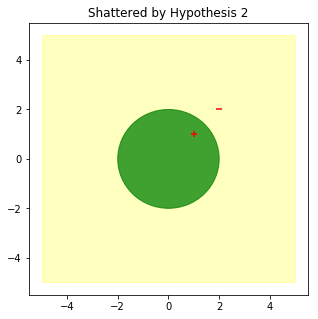

In [374]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
axes.fill([-5,-5,5,5],[-5,5,5,-5], zorder=1,color='yellow',alpha=0.25)
axes.add_patch(plt.Circle((0, 0), 2, color='green',alpha=0.75))
axes.scatter([1],[1],marker='+',color='r',zorder=2)
axes.scatter([2],[2],marker='_',color='r',zorder=2)
axes.set_title("Shattered by Hypothesis 2")
plt.show()

Hence lower bound for VCDim=2

** Incrementing to 3 points**

For let us consider any set of 3 points p1, p2 and p3.<br>
Let p1 < p2 < p3.<br>
<br>
**Assumption**
 - p1 - negative
 - p2 - positive
 - p3 - negative
<br>

**Hypothesis 1<br><br>**
Let the radius be r

When r < p1 :<br>
All three points get classified as positive but p1 and p3 are negative and hence it cannot be shattered<br>

When p1 < r < p2 :<br>
It will classify p3 incorrectly as positive and hence it cannot be shattered<br>

When p2 < r < p3 :<br>
It will classify p2 incorrectly as negative and hence it cannot be shattered<br>

When r > p3 :<br>
It will classify p2 incorrectly as negative and hence it cannot be shattered<br>


**Hypothesis 2<br><br>**
Let the radius be r

When r < p1 :<br>
All three points get classified as negative but p2 is positive and hence it cannot be shattered<br>

When p1 < r < p2 :<br>
It will classify p1 and p2 incorrectly and hence it cannot be shattered<br>

When p2 < r < p3 :<br>
It will classify p2 incorrectly as positive and hence it cannot be shattered<br>

When r > p3 :<br>
It will classify p1 and p3 incorrectly as positive and hence it cannot be shattered<br>


Hence 3 points cannot be shattered by the 2 Hypotheses. 

Hence<br>
Upper Bound for VCDim =3-1 =2

**VCDim=2**

### [20 points] Problem 3: Empirical Verification of PAC Bounds for Axis-Aligned Rectangles 
***

In the in-class notebook associated with PAC Learnability, we proved a PAC bound for the class of concepts $C$ comprised of axis-aligned rectangles living in $\mathbb{R}^2$ of the form $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers. Specifically, we proved that with probability $1-\delta$, any consistent learner could learn a hypothesis $h$ in $H = C$ with generalization error less than $\epsilon$ provided that the number of training examples satisfied 

$$
m > \frac{4}{\epsilon}\log\frac{4}{\delta}
$$

In this problem you will empirically verify this bound for the restricted concept class $C$ where the rectangles are defined by $(a \leq x \leq b) \wedge (c \leq y \leq d)$ where $a, b, c, d$ are real numbers satisfying $0 \leq a \leq b \leq 100$ and $0 \leq c \leq d \leq 100$. 

**Part A**: The following is a general outline of how you should accomplish this, but it is up to you how you organize your code. 

- Write some code that randomly generates a concept rectangle $c$. 



- Write some code that, given feature vectors of length-2, labels them according to some rectangle (that is, labels a point positive if the point is on the boundary or interior of the rectangle, and negative otherwise).  



- Write some code that, given training examples of length-2, and labeled according to a concept $c$, returns a consistent hypothesis rectangle $h$. 



- Write some code that generates a training set of size $m$, labels them according to a random concept $c$, learns a consistent hypothesis $h$, and then approximates the generalization error by predicting on $1000$ new examples from the same distribution as the training data. 


- Write some code that computes approximate generalization errors for $100$ independent concepts $c$ and associated training sets of size $m$, and returns the worst-case generalization error at the confidence level $1-\delta$.  One way to do this in the case that say $\delta = 0.05$, is to report the $95^\textrm{th}$ percentile of the $100$ samples of the generalization error. We can then say that, in our simulation, $100(1-\delta)\%$ of our observed generalization errors were less than our computed value. (**Bonus**: If your code is efficient, try increasing the number of runs in the simulation to $500$. This should give you a better approximation of the generalization error.) 

**Answer**

The code below has the solutions to the problems in Part A

In [200]:
def generate_concept(lower_limit, upper_limit):
    a = random.uniform(lower_limit, upper_limit)
    b = random.uniform(a, upper_limit)
    c = random.uniform(lower_limit, upper_limit)
    d = random.uniform(c, upper_limit)
    return a,b,c,d

In [201]:
def classify(input_data,a,b,c,d):
    classification = {}
    classification["positive"] = []
    classification["negative"] = []
    if a==-1:
        for v in input_data:
            classification["negative"].append(v)
    else:
        for v in input_data:
            if v[0]>=a and v[0]<=b and v[1]>=c and v[1]<=d:
                classification["positive"].append(v)
            else:
                classification["negative"].append(v)
    return classification

In [203]:
def generate_hypothesis(classification,lower_limit,upper_limit):
    max_x = -1
    min_x = upper_limit+1
    max_y = -1
    min_y = upper_limit+1
    if len(classification.get("positive")) !=0:
        for v in classification.get("positive"):
            if v[0]<min_x:
                min_x = v[0]
            if v[0]>max_x:
                max_x = v[0]
            if v[1]<min_y:
                min_y = v[1]
            if v[1]>max_y:
                max_y = v[1]
        return min_x,max_x,min_y,max_y
    else:
        return -1,-1,-1,-1

In [202]:
def generate_data(m,lower_limit, upper_limit):
    count=1
    training_data = []
    while count<=m:
        x = random.uniform(lower_limit, upper_limit)
        y = random.uniform(lower_limit, upper_limit)
        training_data.append([x,y])
        count = count+1
    return training_data

In [204]:
def get_generalization_error(true_label,predicted_label):
    misclassified = 0
    for point in true_label.get("positive"):
        if point not in predicted_label.get("positive"):
            misclassified = misclassified + 1
    for point in true_label.get("negative"):
        if point not in predicted_label.get("negative"):
            misclassified = misclassified + 1
    return (misclassified/(len(true_label.get("positive"))+len(true_label.get("negative"))))

In [267]:
def get_theoretical_error(m,delta):
    theoretical_error=[]
    import math
    for i in m:
        theoretical_error.append((4/i)*math.log(4/delta))
    return theoretical_error

In [224]:
lower_limit = 1
upper_limit = 100

train_data = generate_data(100,lower_limit, upper_limit)
a,b,c,d = generate_concept(lower_limit, upper_limit)
train_label = classify(train_data,a,b,c,d)
ha,hb,hc,hd = generate_hypothesis(train_label,lower_limit, upper_limit)

test_data = generate_data(1000,lower_limit, upper_limit)
true_label = classify(test_data,a,b,c,d)
predicted_label = classify(test_data,ha,hb,hc,hd)
error = get_generalization_error(true_label,predicted_label)

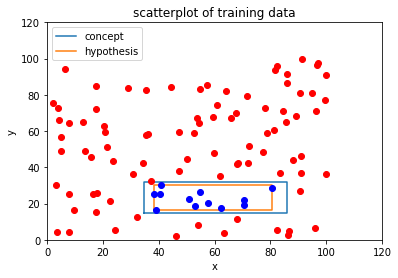

In [228]:
plt.plot([a,a,b,b,a],[c,d,d,c,c],label = "concept")
plt.plot([ha,ha,hb,hb,ha],[hc,hd,hd,hc,hc],label = "hypothesis")

for i in range(0,len(train_data)):
    if train_data[i] in train_label.get("positive"):
        plt.plot(train_data[i][0],train_data[i][1],'bo')
    else:
        plt.plot(train_data[i][0],train_data[i][1],'ro')
plt.xlim([0,120])
plt.ylim([0,120])
plt.title('scatterplot of training data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

The graph above demonstrates a general hypothesis and concept rectangle created using the training data. The blue points are positive and we see that the hypothesis exactly fits the blue points.

In [398]:
def printpercentile(delta,errors):
    for i in range(1,int(delta+1)):
        print(np.percentile(np.array(errors),(100-i)))

In [400]:
errors = []
i=0
while i<101:
    a,b,c,d = generate_concept(lower_limit, upper_limit)
    train_label = classify(train_data,a,b,c,d)
    ha,hb,hc,hd = generate_hypothesis(train_label, lower_limit, upper_limit)

    true_label = classify(test_data,a,b,c,d)
    predicted_label = classify(test_data,ha,hb,hc,hd)
    errors.append(get_generalization_error(true_label,predicted_label))
    i=i+1
printpercentile(0.05*100,errors)
print("95th Percentile = ",np.percentile(np.array(errors),95))

0.009
0.009
0.008
0.005
0.004
95th Percentile =  0.004


**Part B**: Use your code to estimate the generalization error with confidence parameter $\delta=0.05$ for training sets of size $m$ where $m = 250, 500, 1000, 1250,$ and $1500$ and the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the continuous uniform distribution $\textrm{unif}(0,100)$. Make a **log-log** plot with $m$ on the horizontal axes and $\epsilon$ on the vertical axis.  Additionally, overlay the theoretical PAC bound on your graph and discuss your results. 

**Answer**
We see that theoretical bound is higher than the experimental one. In addition, the theoretical and experimental bound tend to converge as the value of m keeps increasing.

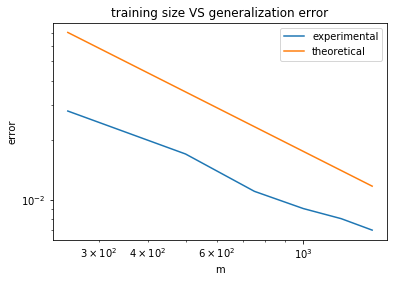

In [364]:
import matplotlib.pyplot as plt
errors = []
theoretical_errors = []
m_values = list(range(250,1600,250))
lower_limit = 1
upper_limit = 100

for m in m_values:
    i=0
    err = []
    while i<500:
        a1,b1,c1,d1 = generate_concept(lower_limit, upper_limit)
        train_data = generate_data(m,lower_limit, upper_limit)
        train_label = classify(train_data,a1,b1,c1,d1)
        ha1,hb1,hc1,hd1 = generate_hypothesis(train_label, lower_limit, upper_limit)

        true_label = classify(test_data,a1,b1,c1,d1)
        predicted_label = classify(test_data,ha1,hb1,hc1,hd1)
        err.append(get_generalization_error(true_label,predicted_label))
        i=i+1
    errors.append(np.percentile(np.array(err),95))
        

theoretical_errors = get_theoretical_error(m_values,0.05)
plt.loglog(m_values,errors,label = "experimental")
plt.loglog(m_values,theoretical_errors,label = "theoretical")
plt.title('training size VS generalization error')
plt.xlabel('m')
plt.ylabel('error')
plt.legend(loc='best')
plt.show()

**Part C**: Repeat **Part B** where the data are comprised of points $(x,y)$ where the $x$- and $y$-values are sampled from the normal distribution with mean $\mu = 50$ and standard deviation $\sigma = 25$. Again, overlay the theoretical PAC bound on your graph and discuss your results. Do you expect to observe very different results than those observed in **Part B**?  

**Answer**

* **Uniform Distribution:** Probability of a point occuring in the given range is the same
* **Normal Distribution:** Probability depends on the mean and the standard deviation and falls as a normal curve

As given in the question with mean = 50 and standard deviation = 25, almost 65% of the points will fall between the lines passing through (75,0), (0,75),(25,0), (0,25). That is (50+25) and (50-25). But in the case of uniform distribution, the points can fall randomly anywhere.

In [365]:
def generate_uniform_data(mu,sigma,m):
    training_data = []
    x = np.random.normal(mu,sigma,m)
    y = np.random.normal(mu,sigma,m)
    for i in range(0,m):
        training_data.append([x[i],y[i]])
    return training_data

In [366]:
def generate_uniform_concept(mu,sigma):
    a = np.random.normal(mu,sigma,1)
    b = np.random.normal(mu,sigma,1)
    while b<a:
        b = np.random.normal(mu,sigma,1)
    c = np.random.normal(mu,sigma,1)
    d = np.random.normal(mu,sigma,1)
    while d<c:
        d = np.random.normal(mu,sigma,1)
    return a,b,c,d

In [367]:
def generate_uniform_hypothesis(classification):
    max_x = -1
    min_x = -1
    max_y = -1
    min_y = -1
    if len(classification.get("positive")) !=0:
        max_x = classification.get("positive")[0][0]
        min_x = classification.get("positive")[0][0]
        max_y = classification.get("positive")[0][1]
        min_y = classification.get("positive")[0][1]
        for v in classification.get("positive"):
            if v[0]<min_x:
                min_x = v[0]
            if v[0]>max_x:
                max_x = v[0]
            if v[1]<min_y:
                min_y = v[1]
            if v[1]>max_y:
                max_y = v[1]
    return min_x,max_x,min_y,max_y

In [368]:
def perform_iteration(mu,sigma,m,test_data):
    train_data = generate_uniform_data(mu, sigma, m)
    a2,b2,c2,d2 = generate_uniform_concept(mu, sigma)
    train_label = classify(train_data,a2,b2,c2,d2)
    ha2,hb2,hc2,hd2 = generate_uniform_hypothesis(train_label)

    true_label = classify(test_data,a2,b2,c2,d2)
    predicted_label = classify(test_data,ha2,hb2,hc2,hd2)
    error = get_generalization_error(true_label,predicted_label)
    return error

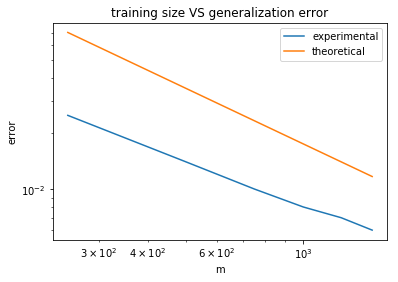

In [369]:
mu = 50
sigma = 25 
test_data = generate_uniform_data(mu, sigma, 1000)
uniform_errors = []
theoretical_uniform_errors = []
m_values = list(range(250,1600,250))

for m in m_values:
    i=0
    uniform_err = []
    while i<500:
        uniform_err.append(perform_iteration(mu,sigma,m,test_data))
        i = i+1
    uniform_errors.append(np.percentile(np.array(uniform_err),95))
theoretical_uniform_errors = get_theoretical_error(m_values,0.05)
plt.loglog(m_values,uniform_errors,label = "experimental")
plt.loglog(m_values,theoretical_uniform_errors,label = "theoretical")
plt.title('training size VS generalization error')
plt.xlabel('m')
plt.ylabel('error')
plt.legend(loc='best')
plt.show()